In [ ]:
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import l2
import os


In [ ]:
import pathlib
import os
data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/Dataset/*.png")
data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/Dataset/")
dataset_path_train = os.listdir(data_dir)
print (dataset_path_train)
print("Types of classes labels found: ", len(dataset_path_train))



['Bacterial Canker', 'Die Back', 'Healthy', 'Powdery Mildew', 'Anthracnose']
Types of classes labels found:  5


In [ ]:
# This Parameter we can use it in the network and model
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
train_ds = image_dataset_from_directory(data_dir,seed = 123,image_size=(img_height, img_width),
                                          validation_split=0.2,
                                          subset='training')

NameError: ignored

In [ ]:
val_ds = image_dataset_from_directory(data_dir, seed = 123,
                                      image_size=(img_height, img_width),
                                      validation_split=0.2,subset='validation')

In [ ]:
test = image_dataset_from_directory(data_dir, seed = 123, image_size=(img_height, img_width),validation_split=None)

In [ ]:
class_names = train_ds.class_names
print(len(class_names))
print( class_names)

In [ ]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

In [ ]:
from keras.layers import Dropout
num_classes = 5
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(16, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('softmax'))
model.add(Dense(num_classes))


In [ ]:
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
epochs = 4
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
pip install tensorflow-hub

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from IPython.display import clear_output
import tensorflow_hub as hub
# Global variables
PATH_TO_DATA = 'Mangodata/'
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
EPOCHS = 10
SHUFFLE_BUFFER = 1000
PRETRAINED_MODEL_PATH = 'https://kaggle.com/models/google/resnet-v2/frameworks/TensorFlow2/variations/50-classification/versions/2'

In [ ]:
train, val = keras.utils.image_dataset_from_directory(
    directory=PATH_TO_DATA,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.1,
    subset='both',
    interpolation='nearest')

Found 4000 files belonging to 8 classes.
Using 3600 files for training.
Using 400 files for validation.


2023-05-24 15:52:54.825739: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3600]
	 [[{{node Placeholder/_4}}]]
2023-05-24 15:52:54.827286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3600]
	 [[{{node Placeholder/_4}}]]


Cutting Weevil


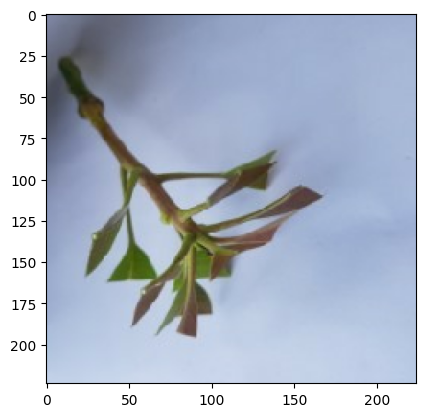

In [ ]:
class_names = train.class_names
for images, labels in train.take(1):
    plt.imshow(images[0])
    print(class_names[tf.argmax(labels[0])])



In [ ]:
data_augmentation = keras.Sequential(
[
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.Rescaling(1/255.)
])

normalization = layers.Rescaling(1/255.)

In [ ]:
training_data = (train.map(lambda x,y: (data_augmentation(x), y))
                 .shuffle(SHUFFLE_BUFFER).prefetch(1).cache())
validation_data = (val.map(lambda x,y: (normalization(x), y))
                   .prefetch(1).cache())

In [ ]:
keras_layer = hub.KerasLayer(PRETRAINED_MODEL_PATH)
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
    filepath='weights.ckpt',
    save_best_only=True,
    save_weights_only=True,
    monitor='val_loss')
]


In [ ]:
inputs = layers.Input(shape=IMG_SIZE + (3,))
x = keras_layer(inputs)
x = tf.keras.layers.Dense(224, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = layers.Dense(len(class_names), activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 1001)              25615849  
                                                                 
 dense_2 (Dense)             (None, 224)               224448    
                                                                 
 dropout_1 (Dropout)         (None, 224)               0         
                                                                 
 dense_3 (Dense)             (None, 8)                 1800      
                                                                 
Total params: 25,842,097
Trainable params: 226,248
Non-trainable params: 25,615,849
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer=rmsprop,
             metrics=['accuracy'])

history = model.fit(training_data,
                    epochs=EPOCHS,
                    validation_data=validation_data,
                    callbacks=callbacks)

Epoch 1/10


2023-05-24 15:53:42.082853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [3600]
	 [[{{node Placeholder/_0}}]]
2023-05-24 15:53:42.083358: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_19' with dtype resource
	 [[{{node Placeholder/_19}}]]
2023-05-24 15:53:43.291044: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall

2023-05-24 15:53:43.747518: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_1' with dtype float and shape [?,?,?,256]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_1}}]]
2023-05-24 15:53:43.747650: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_2' with dtype float and shape [?,?,?,64]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_2}}]]
2023-05-24 15:53:43.747718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INF

2023-05-24 15:53:57.823394: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 27 of 1000
2023-05-24 15:54:06.168792: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 34 of 1000
2023-05-24 15:54:18.964698: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 43 of 1000


In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer=rmsprop,
             metrics=['accuracy'])

history = model.fit(training_data,
                    epochs=EPOCHS,
                    validation_data=validation_data,
                    callbacks=callbacks)

NameError: name 'model' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras import regularizers
img_dir = 'Mangodata'
data = tf.keras.preprocessing.image_dataset_from_directory(img_dir)


Found 4000 files belonging to 8 classes.


In [ ]:
# Set the input parameters
num_images = data.cardinality().numpy() * 32
img_size = (224, 224)
batch_size = 64
n_classes = 8

# Create the ImageDataGenerator object
datagen = ImageDataGenerator(
        rescale = 1./255,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.3,
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = 'nearest',
        validation_split = 0.20)

# Read original images from input directory
train_data = datagen.flow_from_directory(
    img_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

val_data = datagen.flow_from_directory(
    img_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation')

Found 3200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


2023-05-24 16:08:54.560602: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4000]
	 [[{{node Placeholder/_4}}]]
2023-05-24 16:08:54.562545: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4000]
	 [[{{node Placeholder/_4}}]]


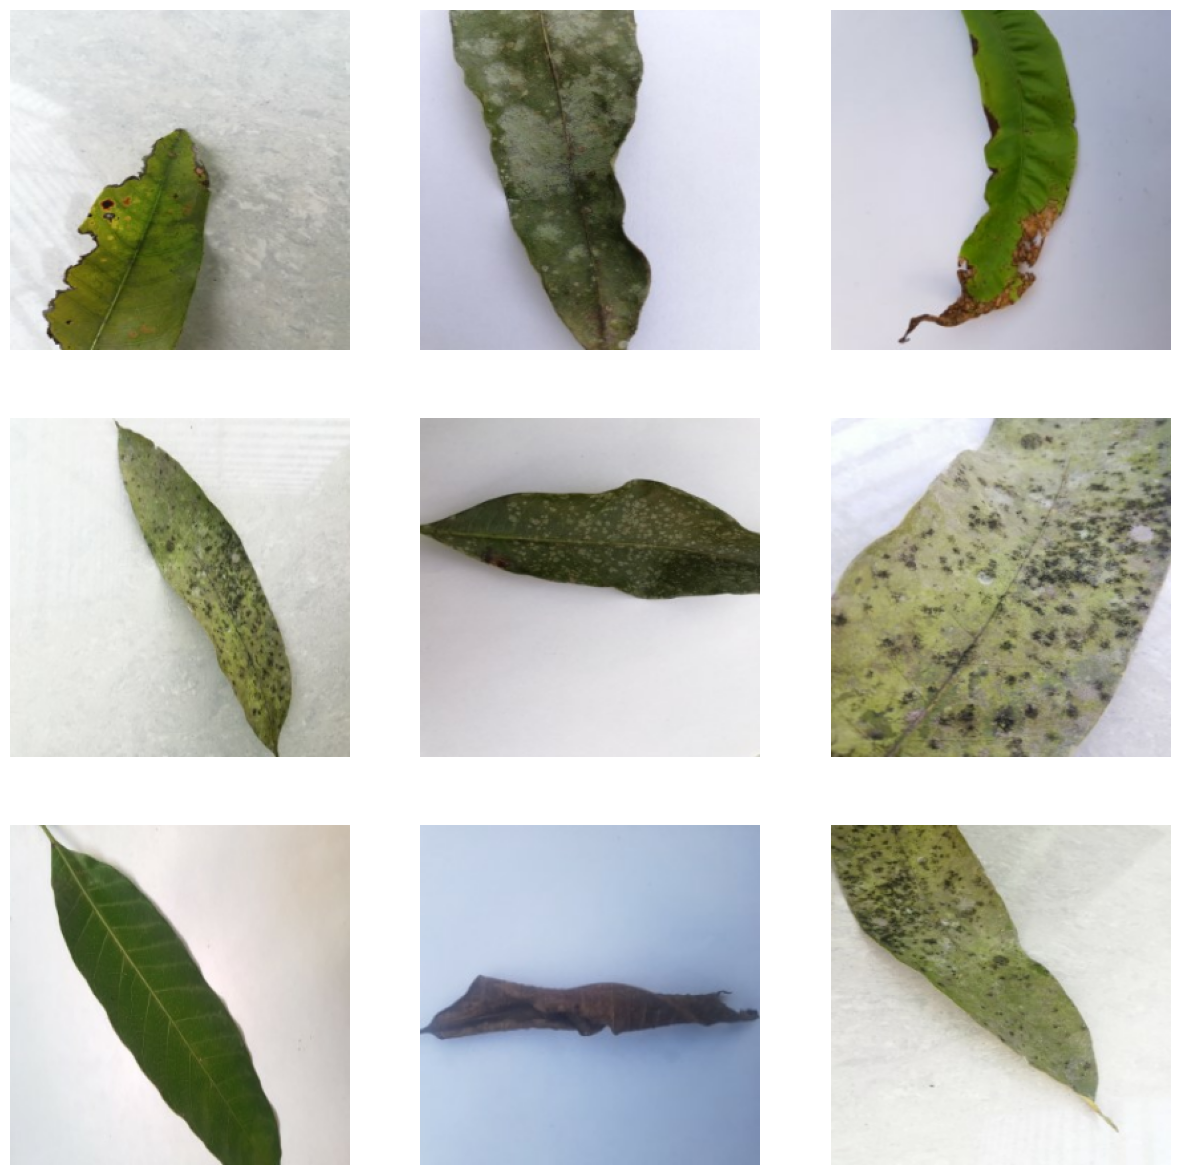

In [ ]:
plt.figure(figsize = (15,15))
for images, labels in data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        ax.imshow(images[i].numpy().astype('uint8'))
        ax.axis('off')


In [ ]:
pre_trained = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

for layer in pre_trained.layers:
    layer.trainable = False


In [ ]:
model = Sequential([
    pre_trained,
    Flatten(),
    BatchNormalization(axis =- 1, momentum = 0.50, epsilon = 0.001),
    Dropout(0.2),
    Dense(64, activation = 'relu'),
    Dropout(0.3),
    Dense(n_classes, activation = 'softmax', kernel_regularizer = regularizers.l1(0.001))
])


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 batch_normalization_94 (Bat  (None, 51200)            204800    
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 64)                3276864   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

In [ ]:
history = model.fit(train_data, epochs = 25, validation_data = val_data)

Epoch 1/25


2023-05-24 16:10:42.134124: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 38535168 exceeds 10% of free system memory.
2023-05-24 16:10:42.255844: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-24 16:10:47.990040: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 38535168 exceeds 10% of free system memory.
2023-05-24 16:10:48.223695: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 100933632 exceeds 10% of free system memory.
2023-05-24 16:10:49.674669: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 97329152 exceeds 10% of free system memory.
2023-05-24 16:10:50.735830: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 194658304 exceeds 10% 

11/50 [=====>........................] - ETA: 1:54 - loss: 2.6783 - accuracy: 0.6406

KeyboardInterrupt: 

In [ ]:
history = model.fit(train_data, epochs = 4, validation_data = val_data)

2023-05-24 16:11:49.546332: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/4
50/50 [==============================] - ETA: 0s - loss: 1.5960 - accuracy: 0.8575

2023-05-24 16:13:28.322566: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - 154s 3s/step - loss: 1.5960 - accuracy: 0.8575 - val_loss: 1.8668 - val_accuracy: 0.8875
Epoch 2/4
50/50 [==============================] - 133s 3s/step - loss: 1.0503 - accuracy: 0.9038 - val_loss: 2.1556 - val_accuracy: 0.8637
Epoch 3/4
50/50 [==============================] - 104s 2s/step - loss: 0.8939 - accuracy: 0.9141 - val_loss: 1.4888 - val_accuracy: 0.8975
Epoch 4/4
50/50 [==============================] - 213s 4s/step - loss: 0.8589 - accuracy: 0.9234 - val_loss: 1.3055 - val_accuracy: 0.8925
